In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Part A

1. We split dataset into traning data and test data. Training and test data are very important in evaluating how well a model generalizes to new data. We use training data for model training for new data, and use test data set for assess the model’s performance on unseen data. In this way, we can avoid overfitting. The data will not only perform well on one data set, but also perform well on new data set. <br>
2. K fold cross-validation is a technique for assessing a model’s performance by dividing the dataset into k equally sized subsets. The training set is split into k smaller sets (cite from <a href="https://scikit-learn.org/stable/modules/cross_validation.html#:~:text=basic%20approach%2C%20called-,k%2Dfold%20CV,-%2C%20the%20training%20set">scikit learn doc</a>).<br>
3. The major difference is how they split the data. K fold cross-validation seperate k datas randomly. However, stratified k fold can make sure that each fold has a similar class distribution, and it is better for imbalanced datasets.<br>
4. Logistic Regression, KNN, Support Vector Machines, Decision Trees<br>
5. Linear Regression, Ridge Regression, Lasso Regression


# Part B

In [2]:
# Q1
data = pd.read_csv("spam_dataset.csv")
data.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#Q2 <br>
These three varible can be important for distingush spam email <br>
data['word_freq_free:']: when talking out free, it may be a fraud, because it is impossible for people to get item free from an email without purchase<br>
data["word_freq_money:"]: money can lead to purchase and buy, can be widely used in advertising. Also, emails mentions money can also be fraud that steal money<br>
data["word_freq_credit:"]: email about credit can be selling credit card, or contains credit card fraud. This type of info should be cautions.

In [3]:
data[['word_freq_free:', "word_freq_money:", "word_freq_credit:"]].head(6)

,word_freq_free:,word_freq_money:,word_freq_credit:
0,0.32,0.00,0.00
1,0.14,0.43,0.00
2,0.06,0.06,0.32
3,0.31,0.00,0.00
4,0.31,0.00,0.00
5,0.00,0.00,0.00


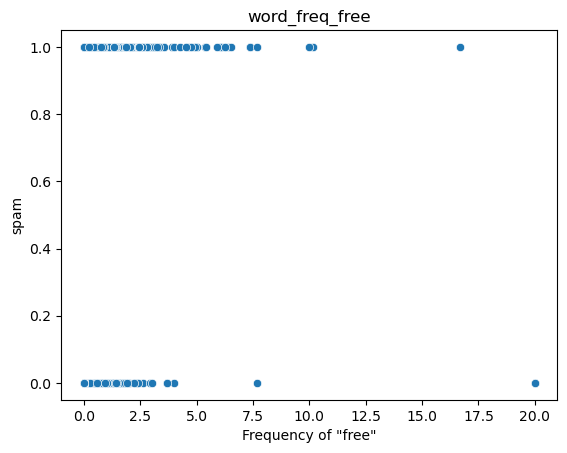

In [4]:
#Q3
sns.scatterplot(data=data, x = 'word_freq_free:', y = "spam")
plt.title('word_freq_free')
plt.xlabel('Frequency of "free"')
plt.ylabel('spam')
plt.show()

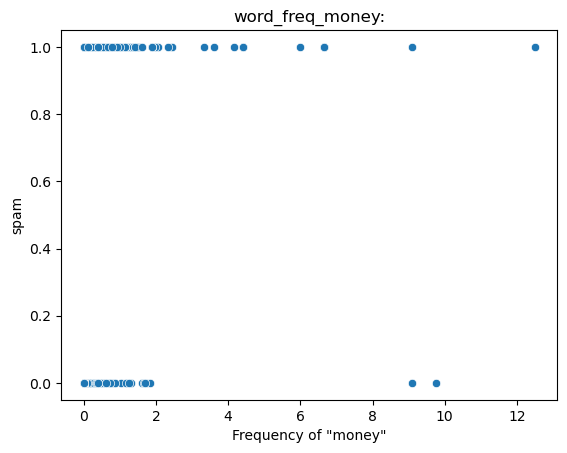

In [5]:
#Q3
sns.scatterplot(data=data, x = 'word_freq_money:', y = "spam")
plt.title('word_freq_money:')
plt.xlabel('Frequency of "money"')
plt.ylabel('spam')
plt.show()

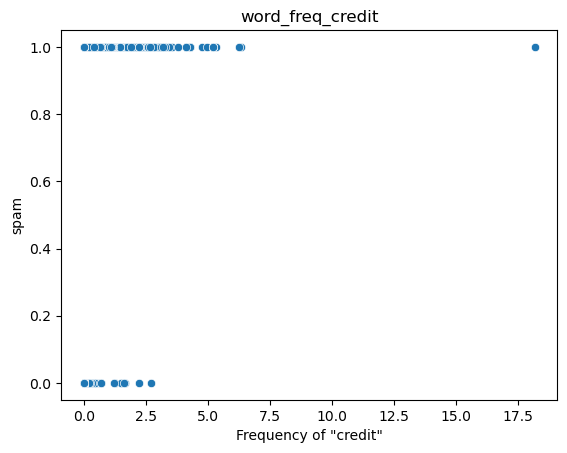

In [6]:
#Q3
sns.scatterplot(data=data, x = 'word_freq_credit:', y = "spam")
plt.title('word_freq_credit')
plt.xlabel('Frequency of "credit"')
plt.ylabel('spam')
plt.show()

In [7]:
y = data["spam"]
X = data[['word_freq_free:', 'word_freq_money:', 'word_freq_credit:']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
#Q4
#SVC Model
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Accuracy
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X, y, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X, y, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X, y, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

Cross-Validated Accuracy Scores: [0.85124864 0.80869565 0.83913043 0.83695652 0.78152174]
Mean Accuracy: 0.8235105981211348
Cross-Validated Precision Scores: [0.90357143 0.83754513 0.8668942  0.87857143 0.74029851]
Mean Precision: 0.8453761377823106
Cross-Validated Recall Scores: [0.6969697  0.63911846 0.69972452 0.67955801 0.68508287]
Mean Recall: 0.6800907112308419
Cross-Validated F1 Scores: [0.78693624 0.725      0.77439024 0.76635514 0.71162123]
Mean F1 Score: 0.752860570868133


In [9]:
#Q5
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X, y, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X, y, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X, y, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))



Cross-Validated Accuracy Scores: [0.76764387 0.78152174 0.7923913  0.80217391 0.78152174]
Mean Accuracy: 0.7850505122031819
Cross-Validated Precision Scores: [0.90710383 0.87850467 0.90186916 0.89473684 0.81568627]
Mean Precision: 0.879580154705476
Cross-Validated Recall Scores: [0.45730028 0.51790634 0.53168044 0.56353591 0.57458564]
Mean Recall: 0.5290017198605848
Cross-Validated F1 Scores: [0.60805861 0.65164645 0.66897747 0.69152542 0.67423015]
Mean F1 Score: 0.6588876188931224


In [10]:
#Q6
#decision Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Accuracy
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X, y, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X, y, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X, y, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

Cross-Validated Accuracy Scores: [0.81324647 0.79673913 0.8326087  0.81413043 0.79021739]
Mean Accuracy: 0.809388424680168
Cross-Validated Precision Scores: [0.93607306 0.85483871 0.9034749  0.91341991 0.79037801]
Mean Precision: 0.8796369185611639
Cross-Validated Recall Scores: [0.56473829 0.58402204 0.6446281  0.58287293 0.63535912]
Mean Recall: 0.6023240947901922
Cross-Validated F1 Scores: [0.70446735 0.69394435 0.75241158 0.71163575 0.70444104]
Mean F1 Score: 0.7133800149605248


In [11]:
#Q7
#knn Model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}
knn = KNeighborsClassifier()
model = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
model.fit(X, y)


# Accuracy
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X, y, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X, y, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X, y, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

Cross-Validated Accuracy Scores: [0.39087948 0.39565217 0.40108696 0.4076087  0.4       ]
Mean Accuracy: 0.39904546098286364
Cross-Validated Precision Scores: [0.38901345 0.39193729 0.39438202 0.39753639 0.39179954]
Mean Precision: 0.3929337408032738
Cross-Validated Recall Scores: [0.95592287 0.96418733 0.96694215 0.98066298 0.95027624]
Mean Recall: 0.9635983136234266
Cross-Validated F1 Scores: [0.55298805 0.55732484 0.56025539 0.56573705 0.55483871]
Mean F1 Score: 0.5582288074228747


for above code, I used knn grid search CV to find best parameter

In [12]:
#Q8
y2 = data["spam"]
X2 = data[['char_freq_(:', 'word_freq_our:', 'char_freq_!:']]

          

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)




#SVC Model
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train2, y_train2)
print("SVC:")

# Accuracy
accuracy_scores = cross_val_score(model, X2, y2, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X2, y2, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X2, y2, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X2, y2, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))








#Logistic Regression
model = LogisticRegression()
model.fit(X_train2, y_train2)
print("Logistic Regression:")

# Accuracy
accuracy_scores = cross_val_score(model, X2, y2, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X2, y2, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X2, y2, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X2, y2, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))











#decision Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train2, y_train2)
print("decision tree:")

# Accuracy
accuracy_scores = cross_val_score(model, X2, y2, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X2, y2, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X2, y2, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X2, y2, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))












#knn Model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}
knn = KNeighborsClassifier()
model = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
model.fit(X2, y2)
print("KNN:")

# Accuracy
accuracy_scores = cross_val_score(model, X2, y2, cv=5, scoring="accuracy")
print("Cross-Validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Precision
precision_scores = cross_val_score(model, X2, y2, cv=5, scoring="precision")
print("Cross-Validated Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

# Recall
recall_scores = cross_val_score(model, X2, y2, cv=5, scoring="recall")
print("Cross-Validated Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

# F1 Score
f1_scores = cross_val_score(model, X2, y2, cv=5, scoring="f1")
print("Cross-Validated F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))




SVC:
Cross-Validated Accuracy Scores: [0.81216069 0.81304348 0.80652174 0.84782609 0.73586957]
Mean Accuracy: 0.8030843128924137
Cross-Validated Precision Scores: [0.76836158 0.78171091 0.80327869 0.85126582 0.65374677]
Mean Precision: 0.7716727555420844
Cross-Validated Recall Scores: [0.74931129 0.73002755 0.67493113 0.74309392 0.69889503]
Mean Recall: 0.7192517845456068
Cross-Validated F1 Scores: [0.75871688 0.75498575 0.73353293 0.79351032 0.67556742]
Mean F1 Score: 0.7432626625407859
Logistic Regression:
Cross-Validated Accuracy Scores: [0.77090119 0.72717391 0.74456522 0.77173913 0.74891304]
Mean Accuracy: 0.7526584997403578
Cross-Validated Precision Scores: [0.81404959 0.76666667 0.8047619  0.84862385 0.71906355]
Mean Precision: 0.7906331113133884
Cross-Validated Recall Scores: [0.54269972 0.44352617 0.46556474 0.51104972 0.59392265]
Mean Recall: 0.5113526018598846
Cross-Validated F1 Scores: [0.65123967 0.56195462 0.58987784 0.63793103 0.6505295 ]
Mean F1 Score: 0.618306533078732

After I run all, the score in general decreased. It didn't improve the score.

#Q9<br>
I think a variable for repetition, which is not included in the dataset, could be crucial for improvement. Typically, spam emails are sent multiple times. If we frequently receive emails from a specific sender without responding, it could be an indicator of spam.